In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Mike optics + pyvista

pyvista is a 3D graphics package / interface to VTK. It is not intended for optical design.

pyvista has many 3D primitives and supports raytracing between those primitives. 

All primitives are stored as triangulated meshes, so surface normals are not the same as for true spheres / parabolas / etc. With sufficiently dense meshes they are arbitrarily close though.

In [4]:
import pyvista as pv

In [5]:
import os
mike_optics_code_location = os.path.join(os.path.abspath(""),'mike_raytrace')

%bookmark current_directory
%cd {mike_optics_code_location}
from raytrace import const_to_vec3, vec_array_dot, vec_array_norm, rotation_matrix
from raytrace import (Rays, Rectangle, IdealLens, SphericalMirror, ToroidalMirror, PlaneGrating, 
                      ParabolicMirror, ParabolicCylinder, 
                      ConicMirror, 
                      OffAxisParabola, OffAxisBiParabola)
%cd current_directory

/home/mike/Documents/Proposals/2022_PICASSO/resources/raytrace_model/mike_raytrace
(bookmark:current_directory) -> /home/mike/Documents/Proposals/2022_PICASSO/resources/raytrace_model
/home/mike/Documents/Proposals/2022_PICASSO/resources/raytrace_model


In [4]:
m0 = Rectangle(center=[0.,0.,0.],
               normal=[0.,-1.,0.], 
               udir=[1.,0.,0.], 
               width=[10.,10.])

In [5]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,1.,0]
orig = np.array([[-5, -5, z] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

testrays = Rays(orig, dirs)
testrays

Ray container: (13,) rays
    origins    : [[-5. -5. -6.]
 [-5. -5. -5.]
 [-5. -5. -4.]
 [-5. -5. -3.]
 [-5. -5. -2.]
 [-5. -5. -1.]
 [-5. -5.  0.]
 [-5. -5.  1.]
 [-5. -5.  2.]
 [-5. -5.  3.]
 [-5. -5.  4.]
 [-5. -5.  5.]
 [-5. -5.  6.]]
    directions : [[0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.70710678 0.        ]]
    wavelengths: [550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550.]
    intensities: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

In [6]:
%%time 
newrays = m0.reflect(testrays)

CPU times: user 473 ms, sys: 2.59 ms, total: 475 ms
Wall time: 472 ms


In [7]:
newrays

Ray container: (13,) rays
    origins    : [[nan nan nan]
 [ 0.  0. -5.]
 [ 0.  0. -4.]
 [ 0.  0. -3.]
 [ 0.  0. -2.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]
 [ 0.  0.  3.]
 [ 0.  0.  4.]
 [ 0.  0.  5.]
 [nan nan nan]]
    directions : [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]]
    wavelengths: [550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550.]
    intensities: [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan]

In [8]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,0.,0.0]
orig = np.array([[-5, 0, z] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

testrays = Rays(orig, dirs)

lens_f = 15.
my_ideal_lens = IdealLens(center=[0,0,0], normal=[-1,0,0], width=100., f=lens_f)

In [9]:
%%time
new_test_rays = my_ideal_lens.refract(testrays)

CPU times: user 81.3 ms, sys: 0 ns, total: 81.3 ms
Wall time: 79.2 ms


In [10]:
new_test_rays

Ray container: (13,) rays
    origins    : [[ 0.  0. -6.]
 [ 0.  0. -5.]
 [ 0.  0. -4.]
 [ 0.  0. -3.]
 [ 0.  0. -2.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]
 [ 0.  0.  3.]
 [ 0.  0.  4.]
 [ 0.  0.  5.]
 [ 0.  0.  6.]]
    directions : [[ 0.92847669  0.          0.37139068]
 [ 0.9486833   0.          0.31622777]
 [ 0.96623494  0.          0.25766265]
 [ 0.98058068  0.          0.19611614]
 [ 0.9912279   0.          0.13216372]
 [ 0.99778516  0.          0.06651901]
 [ 1.          0.          0.        ]
 [ 0.99778516  0.         -0.06651901]
 [ 0.9912279   0.         -0.13216372]
 [ 0.98058068  0.         -0.19611614]
 [ 0.96623494  0.         -0.25766265]
 [ 0.9486833   0.         -0.31622777]
 [ 0.92847669  0.         -0.37139068]]
    wavelengths: [550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550. 550.]
    intensities: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

In [11]:
p0 = new_test_rays.origins[:,[0,2]]
p1 = p0 + new_test_rays.directions[:,[0,2]]*20

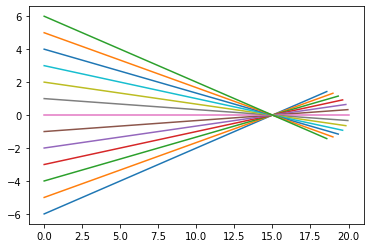

In [12]:
[plt.plot(*np.transpose([pp0,pp1])) for pp0, pp1 in zip(p0, p1)];

In [13]:
d0 = Rectangle(center=[lens_f, 0., 0.],
               normal=[1., 0., 0.],
               udir=[0.,1.,0.],
               width=10.)
d0.detector_coords(new_test_rays)[:,1]

DeviceArray([ 0.0000000e+00,  8.8817842e-16,  0.0000000e+00,
              0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
              0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
              0.0000000e+00,  0.0000000e+00, -8.8817842e-16,
              0.0000000e+00], dtype=float64)

### Michelson Interferometer

In [14]:
M2_pos_diff = 100.0

BS = Rectangle(center=[0.,0.,0.],
               normal=[1.,1.,0.],
               vdir=[0,0,1],
               width=25,
               reflectivity=0.5, 
               transmission=0.5)

M1 = Rectangle(center=[-50., 0, 0],
               normal=[-1.,0,0],
               vdir=[0,0,1.],
               width=25.)
M2 = Rectangle(center=[0, 50.+M2_pos_diff, 0],
               normal=[0.,-1.,0],
               vdir=[0,0,1.],
               width=25.)

L = IdealLens(center=[20.,0,0],
              normal=[1.,0,0],
              width=25,
              f=150)

C = Rectangle(center=[170., 0, 0],
              normal=[-1,0,0],
              vdir=[0,0,1],
              width=25.)

n_angles=101
field_size_deg=0.2

field_size_rad = np.radians(field_size_deg)
angle_array = np.linspace(-field_size_rad, field_size_rad, n_angles)


from scipy.spatial.transform import Rotation as R

ray_dirs = np.empty((n_angles, n_angles, 3))
for ia, alpha in enumerate(angle_array):
    for ib, beta in enumerate(angle_array):
        zrot = R.from_rotvec(alpha*np.array([0,0,1.]))
        xrot = R.from_rotvec(beta*np.array([1.,0,0]))
        
        tdir = xrot.apply(zrot.apply(np.array([0,1.,0])))
        
        ray_dirs[ia,ib,:] = tdir
        
ray_origins = np.zeros_like(ray_dirs) + [0,-20,0]
        
testrays = Rays(origins=ray_origins, directions=ray_dirs)

def path1(rays):
    # TODO: replace with helper method
    
    rays1 = BS.reflect(rays)
    rays2 = M1.reflect(rays1)
    rays3 = BS.pass_through(rays2)
    rays4 = L.refract(rays3)
    rays5 = C.detect(rays4)
    
    vec1 = rays1.origins - rays.origins
    vec2 = rays2.origins - rays1.origins
    vec3 = rays3.origins - rays2.origins
    vec4 = rays4.origins - rays3.origins
    vec5 = rays5.origins - rays4.origins
    
    d1 = vec_array_norm(vec1)
    d2 = vec_array_norm(vec2)
    d3 = vec_array_norm(vec3)
    d4 = vec_array_norm(vec4)
    d5 = vec_array_norm(vec5)
    
    return d1+d2+d3+d4+d5

def path2(rays):
    
    rays1 = BS.pass_through(rays)
    rays2 = M2.reflect(rays1)
    rays3 = BS.reflect(rays2)
    rays4 = L.refract(rays3)
    rays5 = C.detect(rays4)
    
    vec1 = rays1.origins - rays.origins
    vec2 = rays2.origins - rays1.origins
    vec3 = rays3.origins - rays2.origins
    vec4 = rays4.origins - rays3.origins
    vec5 = rays5.origins - rays4.origins
    
    d1 = vec_array_norm(vec1)
    d2 = vec_array_norm(vec2)
    d3 = vec_array_norm(vec3)
    d4 = vec_array_norm(vec4)
    d5 = vec_array_norm(vec5)
    
    return d1+d2+d3+d4+d5

def get_detector_interference(rays):   
    pdiff = path1(rays) - path2(rays)
    
    combined = 2*(1+np.cos(2*np.pi/(1e-6*rays.wavelengths)*pdiff))
    
    return combined

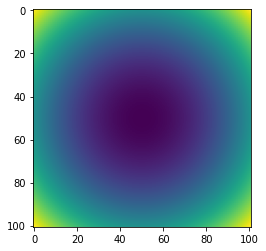

In [15]:
plt.imshow(path1(testrays))

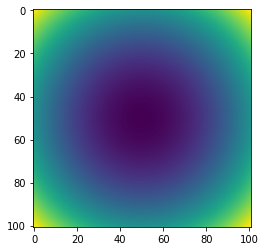

In [16]:
plt.imshow(path2(testrays))

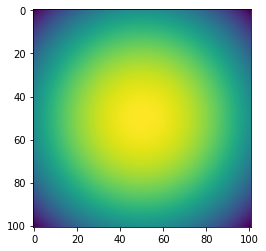

In [17]:
plt.imshow(path1(testrays)-path2(testrays))

CPU times: user 155 ms, sys: 11.3 ms, total: 166 ms
Wall time: 157 ms


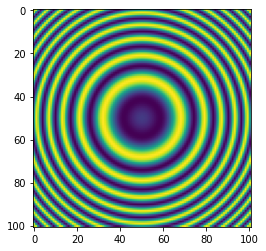

In [18]:
%%time
plt.imshow(get_detector_interference(testrays))

In [19]:
def michelson_interferogram(M2_pos_diff=0.0, n_angles=51, field_size_deg=0.2):

    BS = Rectangle(center=[0.,0.,0.],
                   normal=[1.,1.,0.],
                   vdir=[0,0,1],
                   width=25,
                   reflectivity=0.5, 
                   transmission=0.5)

    M1 = Rectangle(center=[-50., 0, 0],
                   normal=[-1.,0,0],
                   vdir=[0,0,1.],
                   width=25.)
    M2 = Rectangle(center=[0, 50.+M2_pos_diff, 0],
                   normal=[0.,-1.,0],
                   vdir=[0,0,1.],
                   width=25.)

    L = IdealLens(center=[20.,0,0],
                  normal=[1.,0,0],
                  width=25,
                  f=150)

    C = Rectangle(center=[170., 0, 0],
                  normal=[-1,0,0],
                  vdir=[0,0,1],
                  width=25.)

    n_angles=51
    field_size_deg=0.2

    field_size_rad = np.radians(field_size_deg)
    angle_array = np.linspace(-field_size_rad, field_size_rad, n_angles)
    
    from scipy.spatial.transform import Rotation as R

    ray_dirs = np.empty((n_angles, n_angles, 3))
    for ia, alpha in enumerate(angle_array):
        for ib, beta in enumerate(angle_array):
            zrot = R.from_rotvec(alpha*np.array([0,0,1.]))
            xrot = R.from_rotvec(beta*np.array([1.,0,0]))

            tdir = xrot.apply(zrot.apply(np.array([0,1.,0])))

            ray_dirs[ia,ib,:] = tdir

    ray_origins = np.zeros_like(ray_dirs) + [0,-20,0]

    testrays = Rays(origins=ray_origins, directions=ray_dirs)
    
    def path1(rays):
        # TODO: replace with helper method

        rays1 = BS.reflect(rays)
        rays2 = M1.reflect(rays1)
        rays3 = BS.pass_through(rays2)
        rays4 = L.refract(rays3)
        rays5 = C.detect(rays4)

        vec1 = rays1.origins - rays.origins
        vec2 = rays2.origins - rays1.origins
        vec3 = rays3.origins - rays2.origins
        vec4 = rays4.origins - rays3.origins
        vec5 = rays5.origins - rays4.origins

        d1 = vec_array_norm(vec1)
        d2 = vec_array_norm(vec2)
        d3 = vec_array_norm(vec3)
        d4 = vec_array_norm(vec4)
        d5 = vec_array_norm(vec5)

        return d1+d2+d3+d4+d5

    def path2(rays):

        rays1 = BS.pass_through(rays)
        rays2 = M2.reflect(rays1)
        rays3 = BS.reflect(rays2)
        rays4 = L.refract(rays3)
        rays5 = C.detect(rays4)

        vec1 = rays1.origins - rays.origins
        vec2 = rays2.origins - rays1.origins
        vec3 = rays3.origins - rays2.origins
        vec4 = rays4.origins - rays3.origins
        vec5 = rays5.origins - rays4.origins

        d1 = vec_array_norm(vec1)
        d2 = vec_array_norm(vec2)
        d3 = vec_array_norm(vec3)
        d4 = vec_array_norm(vec4)
        d5 = vec_array_norm(vec5)

        return d1+d2+d3+d4+d5

    def get_detector_interference(rays):   
        pdiff = path1(rays) - path2(rays)

        combined = 1+np.cos(2*np.pi/(1e-6*rays.wavelengths)*pdiff)

        return combined
    
    return get_detector_interference(testrays)

In [20]:
import ipywidgets as widgets
from ipywidgets import interactive

In [21]:
def interferogram_slider(M2_offset):
    plt.imshow(michelson_interferogram(M2_offset), vmax=2, vmin=0, cmap='Greys')

In [22]:
interactive(interferogram_slider, M2_offset=widgets.FloatSlider(min=0.0, max=100.0, value=25.0, step=2.5))

interactive(children=(FloatSlider(value=25.0, description='M2_offset', step=2.5), Output()), _dom_classes=('wi…

# spherical mirror test

In [23]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,0.,0.0]
orig = np.array([[-5, 0, z] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

test_rays = Rays(orig, dirs)

lens_f = 15.
my_spherical_mirror = SphericalMirror(center=[20, 0, 0],
                                      normal=[-1,0,0],
                                      width=25.,
                                      f=lens_f)

In [24]:
zcoords

array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [25]:
%%time
new_test_rays = my_spherical_mirror.reflect(test_rays)

CPU times: user 180 ms, sys: 0 ns, total: 180 ms
Wall time: 177 ms


In [26]:
i0 = test_rays.origins[:,[0,2]]
f0 = new_test_rays.origins[:,[0,2]]
f1 = f0 + new_test_rays.directions[:,[0,2]]*20

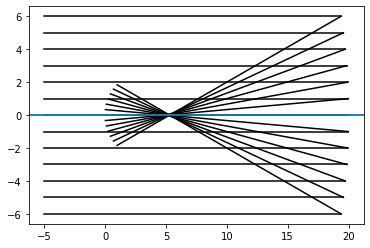

In [27]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*my_spherical_mirror._f
plt.axhline(focalpoint_z)

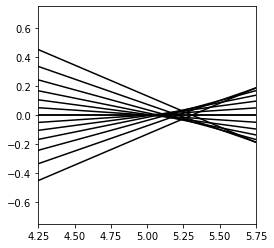

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)


[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_spherical_mirror._center[0]-my_spherical_mirror._f)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_z-width, focalpoint_z+width])
ax.set_aspect('equal')

# parabolic mirror test

In [29]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,0.,0.0]
orig = np.array([[-5, z, 0] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

test_rays = Rays(orig, dirs)

lens_f = 15.
my_parabolic_mirror = ParabolicMirror(center=[20, 0, 0],
                                      normal=[-1,0,0],
                                      width=25.,
                                      f=lens_f)

In [30]:
zcoords

array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [31]:
%%time
new_test_rays = my_parabolic_mirror.reflect(test_rays)

CPU times: user 166 ms, sys: 6.08 ms, total: 172 ms
Wall time: 165 ms


In [32]:
new_test_rays

Ray container: (13,) rays
    origins    : [[19.4        -6.          0.        ]
 [19.58333333 -5.          0.        ]
 [19.73333333 -4.          0.        ]
 [19.85       -3.          0.        ]
 [19.93333333 -2.          0.        ]
 [19.98333333 -1.          0.        ]
 [20.          0.          0.        ]
 [19.98333333  1.          0.        ]
 [19.93333333  2.          0.        ]
 [19.85        3.          0.        ]
 [19.73333333  4.          0.        ]
 [19.58333333  5.          0.        ]
 [19.4         6.          0.        ]]
    directions : [[-0.92307692  0.38461538  0.        ]
 [-0.94594595  0.32432432  0.        ]
 [-0.9650655   0.26200873  0.        ]
 [-0.98019802  0.1980198   0.        ]
 [-0.99115044  0.13274336  0.        ]
 [-0.99778024  0.06659267  0.        ]
 [-1.          0.          0.        ]
 [-0.99778024 -0.06659267  0.        ]
 [-0.99115044 -0.13274336  0.        ]
 [-0.98019802 -0.1980198   0.        ]
 [-0.9650655  -0.26200873  0.        ]
 [-

In [33]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*20

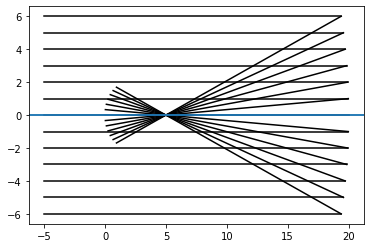

In [34]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*my_parabolic_mirror._f
plt.axhline(focalpoint_z)

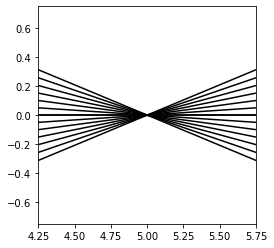

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)


[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_parabolic_mirror._center[0]-my_parabolic_mirror._f)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_z-width, focalpoint_z+width])
ax.set_aspect('equal')

# off-axis parabolic mirror test

In [36]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,0.05,0.]
orig = np.array([[-5, z, 0] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

test_rays = Rays(orig, dirs)

off_axis_mirror_center = np.array([20, 0, 0])
lens_f = 15.
parabola_focus = np.array([5, 10, 0]) #off_axis_mirror_center - np.array([lens_f, 0, 5])
my_parabolic_mirror = OffAxisParabola(center=[20, 0, 0],
                                      axis_out=[-1,0,0],
                                      focus=parabola_focus, 
                                      width=25.)

In [37]:
my_parabolic_mirror._focus

DeviceArray([ 5, 10,  0], dtype=int64)

In [38]:
my_parabolic_mirror._vertex

DeviceArray([21.51387819, 10.        ,  0.        ], dtype=float64)

In [39]:
my_parabolic_mirror._u0

DeviceArray(10., dtype=float64)

In [40]:
my_parabolic_mirror._v0

DeviceArray(0., dtype=float64)

In [41]:
pl = pv.Plotter()
pl.add_mesh(my_parabolic_mirror.get_pvobj(), color='silver')
pl.show(window_size=[2048, 1024])
pl.add_axes()

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

<vtkmodules.vtkRenderingAnnotation.vtkAxesActor(0x46048b0) at 0x7f93f4200460>

In [42]:
zcoords

array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [43]:
%%time
new_test_rays = my_parabolic_mirror.reflect(test_rays)

CPU times: user 180 ms, sys: 8.5 ms, total: 189 ms
Wall time: 182 ms


In [44]:
new_test_rays

Ray container: (13,) rays
    origins    : [[18.17946962 -4.84102652  0.        ]
 [18.62296638 -3.81885168  0.        ]
 [19.03420289 -2.79828986  0.        ]
 [19.41333139 -1.77933343  0.        ]
 [19.76050291 -0.76197485  0.        ]
 [20.07586734  0.25379337  0.        ]
 [20.35957337  1.26797867  0.        ]
 [20.61176855  2.28058843  0.        ]
 [20.83259927  3.29162996  0.        ]
 [21.02221081  4.30111054  0.        ]
 [21.18074732  5.30903737  0.        ]
 [21.30835185  6.31541759  0.        ]
 [21.40516636  7.32025832  0.        ]]
    directions : [[-0.62584246  0.7799495   0.        ]
 [-0.66560313  0.74630588  0.        ]
 [-0.70432196  0.70988068  0.        ]
 [-0.74174285  0.67068439  0.        ]
 [-0.77760236  0.62875637  0.        ]
 [-0.81163355  0.58416691  0.        ]
 [-0.84357025  0.53701884  0.        ]
 [-0.87315181  0.48744837  0.        ]
 [-0.90012818  0.43562513  0.        ]
 [-0.92426506  0.38175136  0.        ]
 [-0.94534903  0.32606012  0.        ]
 [-

In [45]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*20

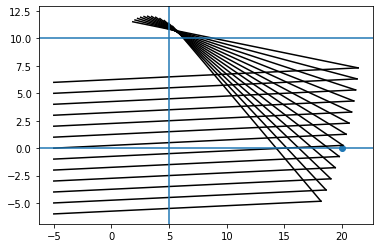

In [46]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_x = my_parabolic_mirror._focus[0]
focalpoint_y = my_parabolic_mirror._focus[1]

plt.scatter(my_parabolic_mirror._center[0], my_parabolic_mirror._center[1])
plt.axvline(focalpoint_x)
plt.axhline(focalpoint_y)

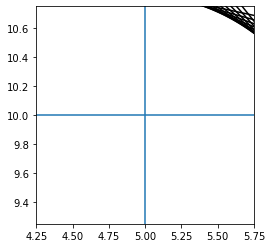

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)


[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];


width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_y-width, focalpoint_y+width])
plt.axvline(focalpoint_x)
plt.axhline(focalpoint_y)
ax.set_aspect('equal')

# conic mirror test

In [48]:
zcoords = np.linspace(-6,6,13)
raydir = [1.,0.,0.0]
orig = np.array([[-5, z, 0] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

test_rays = Rays(orig, dirs)

lens_f = 15.
my_conic_mirror = ConicMirror(center=[20, 0, 0],
                                  normal=[-1,0,0],
                                  width=25.,
                                  c=0.0,
                                  k=0.0,
                                  alpha=[2e-2, -2e-5])

In [49]:
pl = pv.Plotter()
pl.add_mesh(my_conic_mirror.get_pvobj(), color='silver')
pl.add_mesh(my_parabolic_mirror.get_pvobj(), color='gold')
pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

In [50]:
zcoords

array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [51]:
%%time
new_test_rays = my_conic_mirror.reflect(test_rays)

rpow.shape = (13, 2)
self._alpha = DeviceArray([ 2.e-02, -2.e-05], dtype=float64)
Traced<ShapedArray(int64[2])>with<DynamicJaxprTrace(level=1/0)>
rpow.shape = (13, 2)
self._alpha = DeviceArray([ 2.e-02, -2.e-05], dtype=float64)
[1 2]
CPU times: user 609 ms, sys: 7.11 ms, total: 616 ms
Wall time: 613 ms


In [52]:
uvcoords=np.array([[0., 0.]])

my_conic_mirror.shape(uvcoords[...,0],uvcoords[...,1])

DeviceArray([0.], dtype=float64)

In [53]:
my_conic_mirror.surf_normal(uvcoords[...,0],uvcoords[...,1])

rpow.shape = (1, 2)
self._alpha = DeviceArray([ 2.e-02, -2.e-05], dtype=float64)
[1 2]


DeviceArray([[-0., -0.,  1.]], dtype=float64)

In [54]:
new_test_rays

Ray container: (13,) rays
    origins    : [[19.30592 -6.       0.     ]
 [19.5125  -5.       0.     ]
 [19.68512 -4.       0.     ]
 [19.82162 -3.       0.     ]
 [19.92032 -2.       0.     ]
 [19.98002 -1.       0.     ]
 [20.       0.       0.     ]
 [19.98002  1.       0.     ]
 [19.92032  2.       0.     ]
 [19.82162  3.       0.     ]
 [19.68512  4.       0.     ]
 [19.5125   5.       0.     ]
 [19.30592  6.       0.     ]]
    directions : [[-0.90548018  0.42438855  0.        ]
 [-0.93031561  0.36675997  0.        ]
 [-0.95314824  0.3025036   0.        ]
 [-0.97260784  0.23245211  0.        ]
 [-0.98748281  0.15772664  0.        ]
 [-0.99681786  0.07971297  0.        ]
 [-1.          0.          0.        ]
 [-0.99681786 -0.07971297  0.        ]
 [-0.98748281 -0.15772664  0.        ]
 [-0.97260784 -0.23245211  0.        ]
 [-0.95314824 -0.3025036   0.        ]
 [-0.93031561 -0.36675997  0.        ]
 [-0.90548018 -0.42438855  0.        ]]
    wavelengths: [550. 550. 550. 550. 550

In [55]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*20

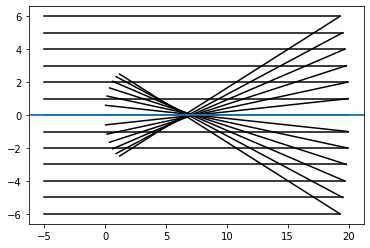

In [56]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*lens_f
plt.axhline(focalpoint_z)

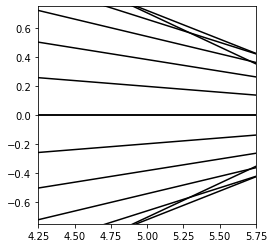

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)


[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_conic_mirror._center[0]-lens_f)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_z-width, focalpoint_z+width])
ax.set_aspect('equal')

# toroidal mirror test

In [58]:
coords = np.linspace(-6, 6, 11)
raydir = [1., 0., 0.]
orig = np.concatenate([np.array([[-5, 0, z] for z in coords]), np.array([[-5, y, 0] for y in coords])])
dirs = np.array([raydir for o in orig])

test_rays = Rays(orig, dirs)

lens_f = 15.
my_toroidal_mirror = ToroidalMirror(center=[20, 0, 0],
                                    normal=[-1,0,0],
                                    vdir=[0,0,1],
                                    width=[10.,20.],
                                    fu=lens_f,
                                    fv=0.8*lens_f)

In [59]:
my_toroidal_mirror._fv

DeviceArray(12., dtype=float64, weak_type=True)

In [60]:
my_toroidal_mirror._fu

DeviceArray(15., dtype=float64, weak_type=True)

In [61]:
test_element = my_toroidal_mirror

elem_origins = test_element.transform_to_element(test_rays.origins)
elem_directions = test_element.rotate_to_element(test_rays.directions)

In [62]:
%%time
test_element.get_ray_distance(elem_origins, elem_directions)

CPU times: user 354 ms, sys: 3.15 ms, total: 357 ms
Wall time: 346 ms


DeviceArray([24.23790008, 24.51510153, 24.72846392, 24.87969849,
             24.96998123, 25.        , 24.96998123, 24.87969849,
             24.72846392, 24.51510153, 24.23790008, 24.39387691,
             24.61351043, 24.78321675, 24.90384591, 24.97599039,
             25.        , 24.97599039, 24.90384591, 24.78321675,
             24.61351043, 24.39387691], dtype=float64)

In [63]:
%%time
test_element.get_ray_distance_newton(elem_origins, elem_directions)

CPU times: user 182 ms, sys: 1.41 ms, total: 184 ms
Wall time: 174 ms


DeviceArray([24.23790008, 24.51510153, 24.72846392, 24.87969849,
             24.96998123, 25.        , 24.96998123, 24.87969849,
             24.72846392, 24.51510153, 24.23790008, 24.39387691,
             24.61351043, 24.78321675, 24.90384591, 24.97599039,
             25.        , 24.97599039, 24.90384591, 24.78321675,
             24.61351043, 24.39387691], dtype=float64)

In [64]:
%%time
new_test_rays = my_toroidal_mirror.reflect(test_rays)

CPU times: user 562 ms, sys: 0 ns, total: 562 ms
Wall time: 552 ms


In [65]:
new_test_rays

Ray container: (22,) rays
    origins    : [[19.23790008  0.         -6.        ]
 [19.51510153  0.         -4.8       ]
 [19.72846392  0.         -3.6       ]
 [19.87969849  0.         -2.4       ]
 [19.96998123  0.         -1.2       ]
 [20.          0.          0.        ]
 [19.96998123  0.          1.2       ]
 [19.87969849  0.          2.4       ]
 [19.72846392  0.          3.6       ]
 [19.51510153  0.          4.8       ]
 [19.23790008  0.          6.        ]
 [        nan         nan         nan]
 [19.61351043 -4.8         0.        ]
 [19.78321675 -3.6         0.        ]
 [19.90384591 -2.4         0.        ]
 [19.97599039 -1.2         0.        ]
 [20.          0.          0.        ]
 [19.97599039  1.2         0.        ]
 [19.90384591  2.4         0.        ]
 [19.78321675  3.6         0.        ]
 [19.61351043  4.8         0.        ]
 [        nan         nan         nan]]
    directions : [[-0.875       0.          0.48412292]
 [-0.92        0.          0.39191836]
 [-

In [66]:
i0 = test_rays.origins[...,[0,2]]
f0 = new_test_rays.origins[...,[0,2]]
f1 = f0 + new_test_rays.directions[...,[0,2]]*1.2*my_toroidal_mirror._fv

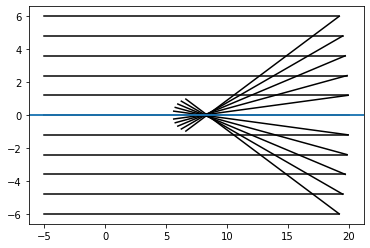

In [67]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*my_toroidal_mirror._fv
plt.axhline(focalpoint_z)

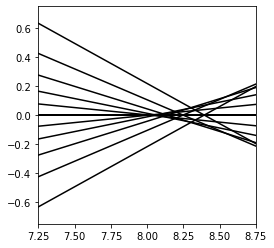

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)


#[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_toroidal_mirror._center[0]-my_toroidal_mirror._fv)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_z-width, focalpoint_z+width])
ax.set_aspect('equal')

In [69]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*1.2*my_toroidal_mirror._fu

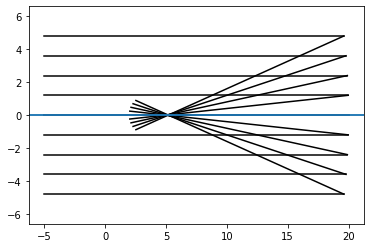

In [70]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_y = np.arcsin(raydir[1]/np.linalg.norm(raydir))*my_toroidal_mirror._fu
plt.axhline(focalpoint_y)

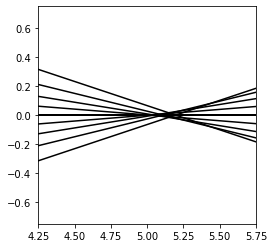

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)


#[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_toroidal_mirror._center[0]-my_toroidal_mirror._fu)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_y-width, focalpoint_y+width])
ax.set_aspect('equal')

In [72]:
pl = pv.Plotter()
pl.add_mesh(my_toroidal_mirror.get_pvobj(), color='silver')

ray0_len = np.abs(my_spherical_mirror._center[0]-test_rays.origins[0,0])
for p0, d0, p1 in zip(test_rays.origins, test_rays.directions, new_test_rays.origins):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray0_len*d0)
        color = 'darkred'
    else:
        line = pv.Line(pointa=p0, pointb=p1)
        color = 'white'
    pl.add_mesh(line, color=color, line_width=2)

ray1_len = 1.2*np.max([my_toroidal_mirror._fu, my_toroidal_mirror._fv])
pvlines1 = [pv.Line(pointa=p, pointb=p+ray1_len*d) 
            for p, d in zip(new_test_rays.origins, new_test_rays.directions)]
for l in pvlines1:
    pl.add_mesh(l, color='lightgreen', line_width=2)

pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

## Parabolic Cylinder test

In [73]:
raygrid_width = 5
ray_offsets = np.linspace(-raygrid_width, raygrid_width, 5)
yorig, zorig = np.meshgrid(ray_offsets, ray_offsets)
xorig = np.full_like(yorig, -5)

orig = np.transpose([xorig, yorig, zorig], (1,2,0))
orig = np.reshape(orig, (-1, 3))
dirs = np.full(orig.shape, raydir)
dirs = np.reshape(dirs, (-1, 3))

test_rays = Rays(orig, dirs)

lens_f = 15.
my_parabolic_cylinder = ParabolicCylinder(center=[20, 0, 0],
                                          normal=[-1,0,0.0],
                                          udir=[0,1,0],
                                          width=[10.,10.],
                                          f=lens_f, 
                                          axis_offset=5.)

In [74]:
my_parabolic_cylinder._f

15.0

In [75]:
test_element = my_parabolic_cylinder

elem_origins = test_element.transform_to_element(test_rays.origins)
elem_directions = test_element.rotate_to_element(test_rays.directions)

In [76]:
%%time
test_element.get_ray_distance(elem_origins, elem_directions)

CPU times: user 262 ms, sys: 499 µs, total: 262 ms
Wall time: 254 ms


DeviceArray([23.75      , 24.47916667, 25.        , 25.3125    ,
             25.41666667, 23.75      , 24.47916667, 25.        ,
             25.3125    , 25.41666667, 23.75      , 24.47916667,
             25.        , 25.3125    , 25.41666667, 23.75      ,
             24.47916667, 25.        , 25.3125    , 25.41666667,
             23.75      , 24.47916667, 25.        , 25.3125    ,
             25.41666667], dtype=float64)

In [77]:
%%time
test_element.get_ray_distance_newton(elem_origins, elem_directions)

CPU times: user 145 ms, sys: 0 ns, total: 145 ms
Wall time: 135 ms


DeviceArray([23.75      , 24.47916667, 25.        , 25.3125    ,
             25.41666667, 23.75      , 24.47916667, 25.        ,
             25.3125    , 25.41666667, 23.75      , 24.47916667,
             25.        , 25.3125    , 25.41666667, 23.75      ,
             24.47916667, 25.        , 25.3125    , 25.41666667,
             23.75      , 24.47916667, 25.        , 25.3125    ,
             25.41666667], dtype=float64)

In [78]:
%%time
new_test_rays = my_parabolic_cylinder.reflect(test_rays)

CPU times: user 417 ms, sys: 4.78 ms, total: 421 ms
Wall time: 412 ms


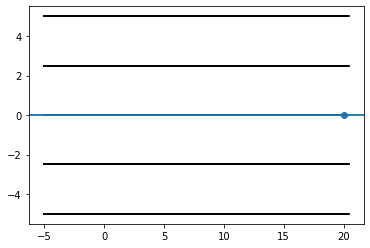

In [79]:
i0 = test_rays.origins[:,[0,2]]
f0 = new_test_rays.origins[:,[0,2]]
f1 = f0 + new_test_rays.directions[:,[0,2]]*1.2*my_parabolic_cylinder._f

[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*my_parabolic_cylinder._f
plt.axhline(focalpoint_z)
plt.scatter(my_parabolic_cylinder._center[0], my_parabolic_cylinder._center[2])

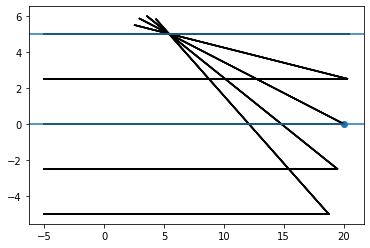

In [80]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*1.2*my_parabolic_cylinder._f

[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_y = np.arcsin(raydir[1]/np.linalg.norm(raydir))*my_parabolic_cylinder._f + my_parabolic_cylinder._axis_offset
plt.axhline(focalpoint_y)
plt.scatter(my_parabolic_cylinder._center[0], my_parabolic_cylinder._center[1])

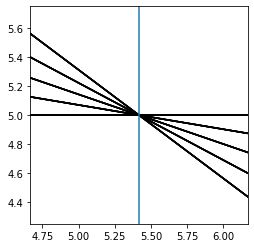

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

#[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_parabolic_cylinder._center[0]-(my_parabolic_cylinder._f - my_parabolic_cylinder._s0))
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_y-width, focalpoint_y+width])
ax.set_aspect('equal')
ax.axvline(focalpoint_x)

In [82]:
np.linalg.norm(np.array([focalpoint_x, focalpoint_y]) - np.array(my_parabolic_cylinder._center)[:-1])

15.416666666666666

In [83]:
np.sqrt((my_parabolic_cylinder._f - my_parabolic_cylinder._s0)**2 + my_parabolic_cylinder._axis_offset**2)

15.416666666666666

In [84]:
pl = pv.Plotter()
pl.add_mesh(my_parabolic_cylinder.get_pvobj(), color='silver')

ray0_len = np.abs(my_parabolic_cylinder._center[0]-test_rays.origins[0,0])
for p0, d0, p1 in zip(test_rays.origins, test_rays.directions, new_test_rays.origins):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray0_len*d0)
        color = 'darkred'
    else:
        line = pv.Line(pointa=p0, pointb=p1)
        color = 'white'
    pl.add_mesh(line, color=color, line_width=2)

ray1_len = 1.2*my_parabolic_cylinder._f
pvlines1 = [pv.Line(pointa=p, pointb=p+ray1_len*d)
            for p, d in zip(new_test_rays.origins, new_test_rays.directions)]
for l in pvlines1:
    pl.add_mesh(l, color='lightgreen', line_width=2)

pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

## Pair of parabolic cylinders

An off axis parabola segment redirects the beam in angle to a focus a certain distance away from the segment center. In terms of the angle $\theta$ and the distance to focus $s$, both measured at mirror center, the focal length of the full parabola is 

$f = (s\,/\,2)\,(1 + \cos\theta)$

and the off-axis distance of the mirror center is 

$d = s\sin\theta$

Using this, we can build a pair of parabolic cylinders that offsets an incoming collimated beam and produces a focus in the horizontal and vertical dimension at different distances.

In [85]:
raygrid_width = 5
ray_offsets = np.linspace(-raygrid_width, raygrid_width, 10)
yorig, zorig = np.meshgrid(ray_offsets, ray_offsets)
xorig = np.full_like(yorig, -5)

orig = np.transpose([xorig, yorig, zorig], (1,2,0))
#orig = np.reshape(orig, (-1, 3))
dirs = np.full(orig.shape, raydir)
#dirs = np.reshape(dirs, (-1, 3))

test_rays = Rays(orig, dirs)
rays0 = test_rays

In [86]:
orig.shape

(10, 10, 3)

In [87]:
horiz_focal_length = 50

down_angle_deg = 27
down_angle_rad = np.deg2rad(down_angle_deg)
down_rotate_mat = rotation_matrix(-down_angle_rad/2, np.array([0,1,0]))
cyl1_normal = np.matmul(down_rotate_mat, [-1,0,0])

pcyl1_width = 10./np.cos(down_angle_rad)
pcyl1 = ParabolicCylinder(center=[20, 0, 0],
                          normal=cyl1_normal,
                          udir=[0,1,0],
                          width=pcyl1_width,
                          f=horiz_focal_length, 
                          axis_offset=0.)

In [88]:
cyl1_normal

array([-0.97236992,  0.        , -0.23344536])

In [98]:
horizontal_mirror_separation = 40

cyl2_det_dist = 50
side_angle_deg = 20
side_angle_rad = np.deg2rad(side_angle_deg)
cyl2_det_vec = np.matmul(rotation_matrix(side_angle_rad,np.array([0,0,1])), np.array([1,0,0]))

cyl2_f = cyl2_det_dist/2.*(1.+np.cos(down_angle_rad))
cyl2_axis_offset = cyl2_det_dist*np.sin(down_angle_rad)

cyl1_cyl2_vec = np.matmul(rotation_matrix(-down_angle_rad, np.array([0,1,0])), [-1,0,0])
cyl2_center = pcyl1._center + cyl1_cyl2_vec*horizontal_mirror_separation/np.cos(down_angle_rad)
cyl2_normal = np.matmul(rotation_matrix(side_angle_rad/2, np.array([0,0,1])),
                        np.matmul(rotation_matrix(-down_angle_rad, np.array([0,1,0])), np.array([1, 0, 0])))

In [107]:
det_center = cyl2_center + 1.0*cyl2_det_dist*cyl2_det_vec

det_normal = -cyl2_det_vec

det = Rectangle(center=det_center, 
                normal=det_normal,
                udir=[0, 1, 0],
                width=pcyl1_width)

In [138]:
# pcyl2 = ParabolicCylinder(center=cyl2_center,
#                           normal=cyl2_normal,
#                           vdir=[0, 1, 0],
#                           width=pcyl1_width,
#                           f=cyl2_f, 
#                           axis_offset=cyl2_axis_offset)

pcyl2 = OffAxisBiParabola(center=cyl2_center,
                          axis_out=-cyl1_cyl2_vec,
                          vdir=np.matmul(rotation_matrix(side_angle_rad/2, np.array([0,0,1])), np.cross(cyl1_cyl2_vec, [0,1,0])),
                          focus_u=cyl2_center + 1000000.*cyl2_det_vec,
                          focus_v=det_center,
                          width=pcyl1_width)

In [139]:
uvcoords = np.array([[0., 0],[-20., 0],[0., 10.],[-20., 10.]])

pcyl2.rotate_to_universal(pcyl2.surf_normal(uvcoords[...,0],uvcoords[...,1]))

DeviceArray([[0.95502606, 0.17842263, 0.23683452],
             [0.95502803, 0.17841252, 0.23683419],
             [0.9257284 , 0.17355731, 0.33601308],
             [0.92573039, 0.17354701, 0.33601292]], dtype=float64)

In [140]:
%%time
rays1 = pcyl1.reflect(rays0)
rays2 = pcyl2.reflect(rays1)
rays3 = det.detect(rays2)

CPU times: user 627 ms, sys: 0 ns, total: 627 ms
Wall time: 611 ms


In [141]:
def pv_ray_plot(plotter, rays, dist=10., rayskip=1):
    it_p0, it_d0 = np.reshape([rays.origins, 
                               rays.directions], (2, -1, 3))[:,::rayskip,:]
    
    for p0, d0 in it_array:
        line = pv.Line(pointa=p0, pointb=p0+dist*d0)
        plotter.add_mesh(line, color='white', line_width=2)
        
def pv_ray2ray_plot(plotter, rays0, rays1, dist=None, rayskip=1, raycolor='white'):
    if dist is None:
        dist = rays1.origins - rays0.origins
        dist = np.linalg.norm(dist, axis=-1)
        dist = np.nanmean(dist)

    flat_p0, flat_d0, flat_p1 = np.reshape(np.array([rays0.origins,
                                                     rays0.directions,
                                                     rays1.origins])[:, ::rayskip, ::rayskip, :],
                                           (3,-1,3))
    
    for p0, d0, p1 in zip(flat_p0, flat_d0, flat_p1):
        if np.any(np.isnan(p1)):
            line = pv.Line(pointa=p0, pointb=p0+dist*d0)
            color = 'darkred'
        else:
            line = pv.Line(pointa=p0, pointb=p1)
            color = raycolor
        pl.add_mesh(line, color=color, line_width=2)

In [142]:
rays0.shape

(10, 10)

In [143]:
pl = pv.Plotter(lighting='three lights')
pl.add_mesh(pcyl1.get_pvobj(), color='silver')
pl.add_mesh(pcyl2.get_pvobj(), color='black')
pl.add_mesh(det.get_pvobj(), color='black')
pl.add_axes()

rayskip = 1 #int(np.floor(np.max(test_rays.shape)/4.))

output_rays = [rays0, rays1, rays2, rays3]
show_rays = [0, 1, 2]

for i in show_rays:
    pv_ray2ray_plot(pl, 
                    output_rays[i],
                    output_rays[i+1],
                    rayskip=rayskip, dist=100,
                    raycolor='pink')

pl.camera.position = [0,0,10000]#[0,-1000,0]
pl.camera.focal_point = det._center #[0.5*(np.min([grating._center[0], detector._center[0]])+camera._center[0]), 0, 0.5*(telescope._center[2]+detector._center[2])]
pl.camera.up = [0,1,0]#[0,0,1]
pl.camera.zoom(80.)
pl.set_background(pv.Color(np.repeat(0.9,3)), top=pv.Color(np.repeat(1.0,3)))
pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

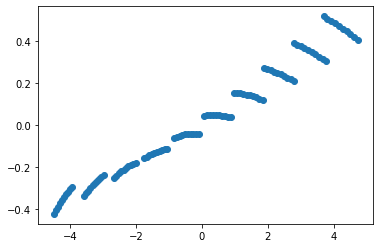

In [144]:
plt.scatter(*np.transpose(np.reshape(det.detector_coords(rays2),(-1,2))))

# off-axis bi-parabola mirror test

In [89]:
coords = np.linspace(-6, 6, 11)
raydir = [1., 0., 0.]
orig = np.concatenate([np.array([[-5, 0, z] for z in coords]), np.array([[-5, y, 0] for y in coords])])
dirs = np.array([raydir for o in orig])

test_rays = Rays(orig, dirs)

mirror_center = np.array([20, 0, 0])
mirror_axis = np.array([-1, 0, 0])

focus_u_distance = 15.
focus_v_distance = 0.75*focus_u_distance
focal_point_direction = np.array([-1,0,0])
focus_u = mirror_center + focus_u_distance*mirror_axis
focus_v = mirror_center + focus_v_distance*mirror_axis
my_biparabola_mirror = OffAxisBiParabola(center=mirror_center,
                                         axis_out=mirror_axis,
                                         vdir=[0, 0, 1],
                                         width=[10., 20.],
                                         focus_u=focus_u,
                                         focus_v=focus_v)

In [93]:
test_element = my_biparabola_mirror

elem_origins = test_element.transform_to_element(test_rays.origins)
elem_directions = test_element.rotate_to_element(test_rays.directions)

In [94]:
%%time
test_element.get_ray_distance_newton(elem_origins, elem_directions)

CPU times: user 302 ms, sys: 450 µs, total: 302 ms
Wall time: 293 ms


DeviceArray([24.2  , 24.488, 24.712, 24.872, 24.968, 25.   , 24.968,
             24.872, 24.712, 24.488, 24.2  , 24.4  , 24.616, 24.784,
             24.904, 24.976, 25.   , 24.976, 24.904, 24.784, 24.616,
             24.4  ], dtype=float64)

In [95]:
%%time
new_test_rays = my_biparabola_mirror.reflect(test_rays)

CPU times: user 322 ms, sys: 0 ns, total: 322 ms
Wall time: 313 ms


In [96]:
new_test_rays

Ray container: (22,) rays
    origins    : [[19.2    0.    -6.   ]
 [19.488  0.    -4.8  ]
 [19.712  0.    -3.6  ]
 [19.872  0.    -2.4  ]
 [19.968  0.    -1.2  ]
 [20.     0.     0.   ]
 [19.968  0.     1.2  ]
 [19.872  0.     2.4  ]
 [19.712  0.     3.6  ]
 [19.488  0.     4.8  ]
 [19.2    0.     6.   ]
 [   nan    nan    nan]
 [19.616 -4.8    0.   ]
 [19.784 -3.6    0.   ]
 [19.904 -2.4    0.   ]
 [19.976 -1.2    0.   ]
 [20.     0.     0.   ]
 [19.976  1.2    0.   ]
 [19.904  2.4    0.   ]
 [19.784  3.6    0.   ]
 [19.616  4.8    0.   ]
 [   nan    nan    nan]]
    directions : [[-0.86721992  0.          0.49792531]
 [-0.91293998  0.          0.40809386]
 [-0.950078    0.          0.31201248]
 [-0.97750044  0.          0.21093338]
 [-0.99432725  0.          0.10636412]
 [-1.          0.          0.        ]
 [-0.99432725  0.         -0.10636412]
 [-0.97750044  0.         -0.21093338]
 [-0.950078    0.         -0.31201248]
 [-0.91293998  0.         -0.40809386]
 [-0.86721992  0.    

In [97]:
i0 = test_rays.origins[:,[0,2]]
f0 = new_test_rays.origins[:,[0,2]]
f1 = f0 + new_test_rays.directions[:,[0,2]]*1.2*focus_v_distance

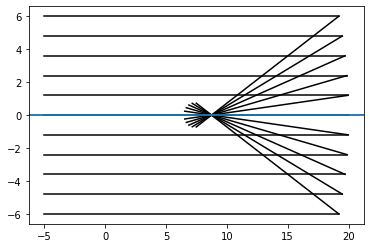

In [98]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_z = np.arcsin(raydir[2]/np.linalg.norm(raydir))*focus_v_distance
plt.axhline(focalpoint_z)

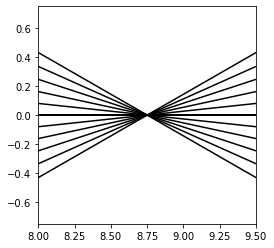

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)


#[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_biparabola_mirror._center[0]-focus_v_distance)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_z-width, focalpoint_z+width])
ax.set_aspect('equal')

In [100]:
i0 = test_rays.origins[:,[0,1]]
f0 = new_test_rays.origins[:,[0,1]]
f1 = f0 + new_test_rays.directions[:,[0,1]]*1.2*focus_u_distance

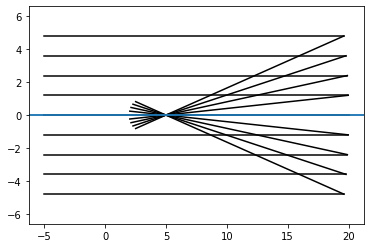

In [101]:
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[plt.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];
plt.axhline(0)
focalpoint_y = np.arcsin(raydir[1]/np.linalg.norm(raydir))*focus_u_distance
plt.axhline(focalpoint_y)

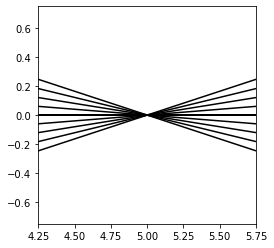

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)


#[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(i0, f0)];
[ax.plot(*np.transpose([pp0,pp1]), color='k') for pp0, pp1 in zip(f0, f1)];

focalpoint_x = (my_biparabola_mirror._center[0]-focus_u_distance)
width=0.75
ax.set_xlim([focalpoint_x-width, focalpoint_x+width])
ax.set_ylim([focalpoint_y-width, focalpoint_y+width])
ax.set_aspect('equal')

In [103]:
pl = pv.Plotter()
pl.add_mesh(my_biparabola_mirror.get_pvobj(), color='silver')

ray0_len = np.abs(my_biparabola_mirror._center[0] - test_rays.origins[0,0])
for p0, d0, p1 in zip(test_rays.origins, test_rays.directions, new_test_rays.origins):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray0_len*d0)
        color = 'darkred'
    else:
        line = pv.Line(pointa=p0, pointb=p1)
        color = 'white'
    pl.add_mesh(line, color=color, line_width=2)

ray1_len = 1.2*np.max([focus_u_distance, focus_v_distance])
pvlines1 = [pv.Line(pointa=p, pointb=p+ray1_len*d) 
            for p, d in zip(new_test_rays.origins, new_test_rays.directions)]
for l in pvlines1:
    pl.add_mesh(l, color='lightgreen', line_width=2)

pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

## test diffraction grating

In [44]:
d0 = PlaneGrating(center=[0.,0.,0.],
                  normal=[0.,-1.,0.], 
                  udir=[1.,0.,0.], 
                  width=[10.,10.],
                  grating_vector=[1., 0, 0.],
                  groove_density=6000.)

In [45]:
zcoords = np.linspace(-6,6,13)
raydir = [0.,1.,0.0]
orig = np.array([[-5, -5, z] for z in zcoords])
dirs = np.array([raydir for z in zcoords])

testrays = Rays(orig, dirs, wavelengths=121.56)
testrays;

In [46]:
%%time 
newrays = d0.diffract(testrays, order=1)

CPU times: user 122 ms, sys: 12.9 ms, total: 135 ms
Wall time: 207 ms


In [47]:
newrays

Ray container: (13,) rays
    origins    : [[nan nan nan]
 [-5.  0. -5.]
 [-5.  0. -4.]
 [-5.  0. -3.]
 [-5.  0. -2.]
 [-5.  0. -1.]
 [-5.  0.  0.]
 [-5.  0.  1.]
 [-5.  0.  2.]
 [-5.  0.  3.]
 [-5.  0.  4.]
 [-5.  0.  5.]
 [nan nan nan]]
    directions : [[-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]
 [-0.72936   -0.6841301  0.       ]]
    wavelengths: [121.56 121.56 121.56 121.56 121.56 121.56 121.56 121.56 121.56 121.56
 121.56 121.56 121.56]
    intensities: [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan]

In [48]:
cos_beta = vec_array_dot(newrays.directions, d0._normal)
cos_beta

DeviceArray([0.6841301, 0.6841301, 0.6841301, 0.6841301, 0.6841301,
             0.6841301, 0.6841301, 0.6841301, 0.6841301, 0.6841301,
             0.6841301, 0.6841301, 0.6841301], dtype=float64)

In [49]:
sin_beta = np.sqrt(1.-cos_beta*cos_beta)
sin_beta

array([0.72936, 0.72936, 0.72936, 0.72936, 0.72936, 0.72936, 0.72936,
       0.72936, 0.72936, 0.72936, 0.72936, 0.72936, 0.72936])

# PyOpTools

In [50]:
import pyoptools.all as pyop
import numpy as np
import matplotlib.pyplot as plt

Loading component library Thorlabs  from files  ['/usr/local/lib/python3.8/dist-packages/pyoptools-0.1.1-py3.8-linux-x86_64.egg/pyoptools/raytrace/library/Thorlabs/thorlabs_cylindrical.cmp', '/usr/local/lib/python3.8/dist-packages/pyoptools-0.1.1-py3.8-linux-x86_64.egg/pyoptools/raytrace/library/Thorlabs/thorlabs_spherical.cmp']
Loading component library Edmund  from files  ['/usr/local/lib/python3.8/dist-packages/pyoptools-0.1.1-py3.8-linux-x86_64.egg/pyoptools/raytrace/library/Edmund/edmund_spherical.cmp']


## Example diffraction grating from pyoptools

In [51]:
off_axis_angle = np.deg2rad(0.)
det_angle = 2*off_axis_angle

In [52]:
groove_spacing=0.0025 #Distancee between adjacent sources on the grating in mm
    
G=pyop.RPPMask(shape=pyop.Rectangular(size=((20,20))),
               phm=pyop.poly2d([0,0,2*np.pi*1/groove_spacing,0,]),
               M=[-1,1], #,0,-1,-2])
               reflectivity=1.)

OC=pyop.Component(surflist=[(G, (0, 0, 0), (0, 0, 0))])

C=pyop.CCD(size=(10,50))

grating_center=np.array([0,0,30])
detector_center=grating_center - 20*np.array([np.sin(det_angle),0,np.cos(det_angle)])
#print(detector_center)

S=pyop.System(complist=[(OC,grating_center,(0,off_axis_angle,0)),
                        (C,detector_center,(0,det_angle,0))],
              n=1)

r=[]
#Test using many wavelengths
for w in (.4,.45,.5,.53,.6,.65,.7):
    for q in np.linspace(-0.01,0.01,10):
        r.append(pyop.Ray(pos=(0,0,15),dir=(q,0.1,1.),wavelength=w)) #standard rays of different wavelength


S.ray_add(r)

CPU times: user 118 ms, sys: 0 ns, total: 118 ms
Wall time: 117 ms


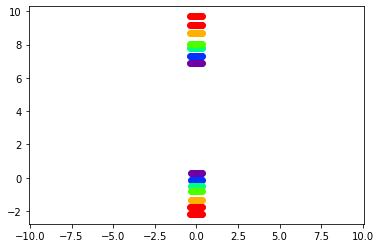

In [53]:
%%time
S.propagate()

# %matplotlib inline
# display(pyop.Plot3D(S,
#                     center=(0,0,60), 
#                     size=(180,150),
#                     scale=3,
#                     rot=[(0,np.pi/2.3,0)]))
pyop.spot_diagram_c(C)

In [54]:
coords=np.array([i[0] for i in C.hit_list])

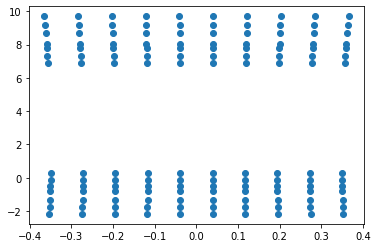

In [55]:
plt.scatter(coords[:,0],coords[:,1])

In [56]:
mike_normal = -np.array([np.sin(off_axis_angle),0.,np.cos(off_axis_angle)])
mike_groovedir = [1.,0.,0.]
mike_groovedir -= np.dot(mike_groovedir, mike_normal)*mike_normal
mike_groovedir /= np.linalg.norm(mike_groovedir)
ray_groovedir_dot = np.abs(np.dot(mike_groovedir, [0,0,1]))
cosgamma = np.sqrt(1-ray_groovedir_dot*ray_groovedir_dot)
singamma=-np.sign(mike_normal[0])*np.sqrt(1-cosgamma*cosgamma)

mike_G=PlaneGrating(center=[0.,0.,30.],
                    normal=mike_normal, 
                    vdir=[0.,1.,0.], 
                    width=20.,
                    grating_vector=np.cross(mike_groovedir, mike_normal),
                    groove_density=(1./groove_spacing))

det_angle = 2*np.arcsin(singamma)
cosdet = np.cos(det_angle)
sindet = np.sin(det_angle)
mike_C=Rectangle(center=(mike_G._center - 20.*np.array([sindet,0,cosdet])),
                 normal=[sindet, 0., cosdet],
                 vdir=[0,1,0],
                 width=[10,50])

#Test using many wavelengths
wavelist = [.4,.45,.5,.53,.6,.65,.7]
dirlist = np.linspace(-0.01,0.01,10)

origins=np.empty((len(wavelist), len(dirlist), 3))
directions=np.empty((len(wavelist), len(dirlist), 3))
wavelengths=np.empty((len(wavelist), len(dirlist)))
for iw, w in enumerate(wavelist):
    for idir, mydir in enumerate(dirlist):
        origins[iw, idir] = [0, 0, 15]
        directions[iw, idir] = [mydir, 0.1, 1]
        wavelengths[iw, idir] = w*1000

r0 = Rays(origins=origins, directions=directions, wavelengths=wavelengths)

CPU times: user 850 ms, sys: 40.3 ms, total: 890 ms
Wall time: 1.67 s


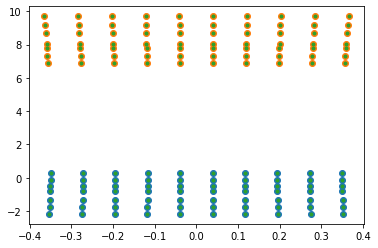

In [57]:
%%time
r11 = mike_G.diffract(r0, order=1)
r21 = mike_C.detect(r11)
c1 = mike_C.detector_coords(r11)

r12 = mike_G.diffract(r0, order=-1)
r22 = mike_C.detect(r12)
c2 = mike_C.detector_coords(r12)

plt.scatter(np.ravel(c1[...,0]),np.ravel(c1[...,1]))
plt.scatter(np.ravel(c2[...,0]),np.ravel(c2[...,1]))
plt.scatter(coords[:,0],coords[:,1], marker='.')

In [58]:
allcoords = np.array([c1, c2])
np.abs((np.sort(np.ravel(allcoords[...,0]))-np.sort(coords[:,0])))/np.sort(coords[:,0])

array([-0.00000000e+00, -1.52810997e-16, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.55900724e-16, -0.00000000e+00,
       -1.57871850e-16, -1.58150766e-16, -0.00000000e+00, -0.00000000e+00,
       -1.58759562e-16, -1.58888062e-16, -1.95484881e-16, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.04284673e-16,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.38998827e-16,
       -0.00000000e+00, -0.00000000e+00, -1.40310776e-16, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.85767293e-16, -0.00000000e+00, -1.14033051e-16, -2.29217131e-16,
       -1.15144780e-16, -0.00000000e+00, -0.00000000e+00, -1.16532501e-16,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.37226355e-16,
       -0.00000000e+00, -

In [59]:
np.abs((np.sort(np.ravel(allcoords[...,1]))-np.sort(coords[:,1])))/np.sort(coords[:,1])

array([-4.09204967e-16, -4.09204967e-16, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -4.09259223e-16, -4.09259223e-16, -0.00000000e+00, -0.00000000e+00,
       -1.26719986e-16, -1.26719986e-16, -2.53451444e-16, -2.53451444e-16,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.63651390e-16, -6.63651390e-16, -4.97774517e-16, -4.97774517e-16,
       -3.31867668e-16, -3.31867668e-16, -6.63759325e-16, -6.63759325e-16,
       -3.31885660e-16, -3.31885660e-16, -1.16175711e-15, -1.16175711e-15,
       -1.45235695e-15, -1.45235695e-15, -1.16198192e-15, -1.16198192e-15,
       -5.81023085e-16, -5.81023085e-16, -1.16207830e-15, -1.16207830e-15,
       -1.70687399e-15, -1.70687399e-15, -1.28035093e-15, -1.28035093e-15,
       -0.00000000e+00, -0.00000000e+00, -8.53730208e-16, -8.53730208e-16,
       -0.00000000e+00, -0.00000000e+00, -3.85003016e-15, -3.85003016e-15,
       -9.63101148e-15, -

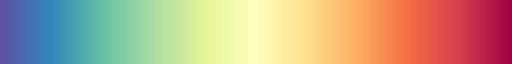

In [60]:
cmap = mpl.colormaps.get('Spectral_r')
cmap

In [61]:
pl = pv.Plotter()
pl.add_mesh(mike_G.get_pvobj(), color='silver')

cmap = mpl.colormaps.get('Spectral')
norm = mpl.colors.Normalize(vmin=np.min(wavelengths), vmax=np.max(wavelengths))
ray0_len = 25.
for p0, d0, p1 in zip(np.reshape(r0.origins,(-1,3)), np.reshape(r0.directions,(-1,3)), np.reshape(r11.origins,(-1,3))):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray0_len*d0)
        color = 'darkred'
    else:
        line = pv.Line(pointa=p0, pointb=p1)
        color = 'white'
    pl.add_mesh(line, color=color, line_width=2)

ray1_len = 25.
for p0, d0, p1, wv in zip(np.reshape(r11.origins,(-1,3)), 
                          np.reshape(r11.directions,(-1,3)), 
                          np.reshape(r21.origins,(-1,3)),
                          np.reshape(r11.wavelengths,-1)):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray1_len*d0)
    else:
        line = pv.Line(pointa=p0, pointb=p1)
    pl.add_mesh(line, color=cmap(norm(wv)), line_width=2)
    
ray1_len = 25.
for p0, d0, p1, wv in zip(np.reshape(r12.origins,(-1,3)), 
                          np.reshape(r12.directions,(-1,3)), 
                          np.reshape(r22.origins,(-1,3)),
                          np.reshape(r12.wavelengths,-1)):
    if np.any(np.isnan(p1)):
        line = pv.Line(pointa=p0, pointb=p0+ray1_len*d0)
    else:
        line = pv.Line(pointa=p0, pointb=p1)
    pl.add_mesh(line, color=cmap(norm(wv)), line_width=2)

pl.add_mesh(mike_C.get_pvobj(), color='gold')

pl.show(window_size=[2048, 1024])

ViewInteractiveWidget(height=1024, layout=Layout(height='auto', width='100%'), width=2048)

## Pyoptools Michelson interferometer

# KrakenOS